In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym

import os
import os.path as path
import wget

In [12]:
X = np.array([-1.,0.,1.])
Y = np.array([2,0,2])


In [13]:
f1 = (Y[1]-Y[0])/(X[1]-X[0])
f2 = (Y[2]-Y[1])/(X[2]-X[1])
print(f1,f2)

-2.0 2.0


In [14]:
d2f = (f2-f1)/(X[2]-X[0])
print(d2f)

2.0


In [15]:
x = np.linspace(-1,1,50)
y = Y[0] +f1*(x-X[0]) + d2f*(x-X[0])*(x-X[1])

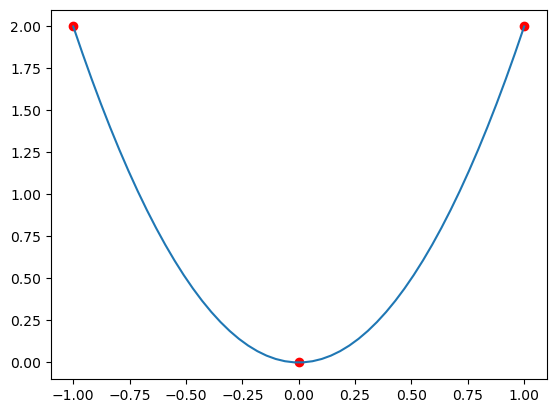

In [9]:
plt.scatter(X,Y,color='r')
plt.plot(x,y)

In [16]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/InterpolacionNewton.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('Archivo descargado')
else:
    print('---Archivo encontrado---')
    Path_ = file

100% [....................................................................................] 45 / 45Archivo descargado


In [5]:
file = 'Data/InterpolacionNewton.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewton.csv'

In [17]:
Data = pd.read_csv(Path_,sep=',')
Data
    

,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


In [18]:
X = np.array(Data.X)
Y = np.array(Data.Y)

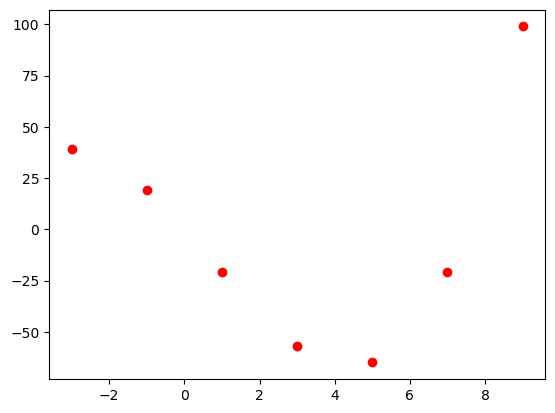

In [19]:
plt.scatter(X,Y,color='r')

In [27]:
Diff = np.zeros(( X.shape[0],Y.shape[0] ))
Diff[:,0] = Y


for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 

Diff

array([[ 39.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 19., -20.,   0.,   0.,   0.,   0.,   0.],
       [-21., -40., -20.,   0.,   0.,   0.,   0.],
       [-57., -36.,   4.,  24.,   0.,   0.,   0.],
       [-65.,  -8.,  28.,  24.,   0.,   0.,   0.],
       [-21.,  44.,  52.,  24.,   0.,   0.,   0.],
       [ 99., 120.,  76.,  24.,   0.,   0.,   0.]])

In [51]:
def InterpolacionNewton(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros(( X.shape[0],Y.shape[0] ))
    h = X[1]-X[0]
    
    Diff[:,0] = Y

    poly = 1.
    
    for i in range(1,len(X)):
        
        poly *= (x-X[i-1])
        
        for j in range(i,len(X)):
            
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 
    
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))
        
    return sum_

In [52]:
xt = np.linspace(np.min(X),np.max(X),100)
yt = []

for x in xt:
    yt.append(InterpolacionNewton(X,Y,x))


TypeError: 'Add' object is not subscriptable

ValueError: x and y must be the same size

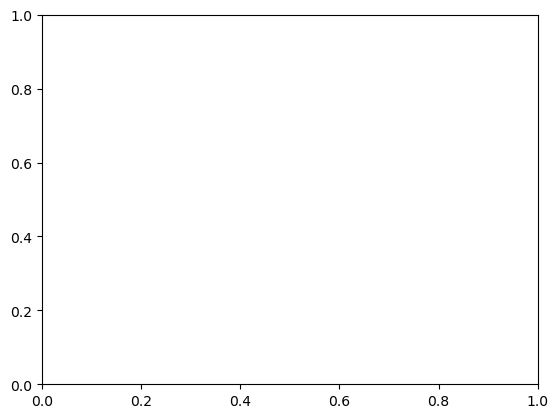

In [48]:
plt.scatter(X,Y,color='r')
plt.plot(xt,yt)

In [ ]:
x = sym.Symbol('x',real=True)


In [49]:
y = InterpolacionNewton(X,Y,x)
y = sym.simplify(y)
y

TypeError: 'Add' object is not subscriptable